In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing


In [3]:
df =pd.read_csv('https://icarus.cs.weber.edu/~hvalle/cs4580/data/teleCust1000t.csv')
df.to_csv('../data/teleCust1000t.scv', index=False)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Our column of interest is CUSTCAT

In [32]:
# How many count of each value
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

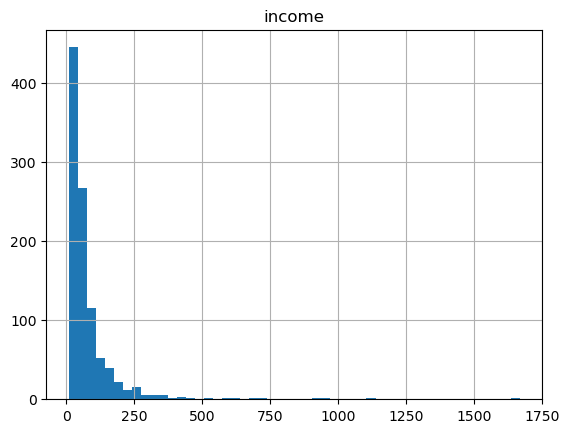

In [33]:
# Visualize the data
df.hist(column='income', bins=50)
plt.show()


In [34]:
# create list of features to classify custcat
cols = df.columns.to_list()
cols.remove('custcat')
print(f'Columns: {cols}')

Columns: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']


In [35]:
X = df[cols].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [36]:
# Dependent variable
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [37]:
# prep data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train and Split data

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print(f'Train set: {X_train.shape} {y_train.shape}')
print(f'Test set: {X_test.shape} {y_test.shape}')

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# KNN classification

In [39]:
# Classification
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# Training
k = 4
# train model
neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neighbor


KNeighborsClassifier(n_neighbors=4)

In [41]:
#predicting
yhat = neighbor.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [42]:
# Accuracy evaluation score for multi level classification
from sklearn import metrics
print(f'Train set accuracy {metrics.accuracy_score(y_train, neighbor.predict(X_train))}')
print(f'Test set accuracy {metrics.accuracy_score(
    y_test, yhat)}')

Train set accuracy 0.5475
Test set accuracy 0.32


In [43]:
# Try k = 6
# Training
k = 6
# train model
neighbor6 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
# predicting
yhat6 = neighbor6.predict(X_test)
yhat6[0:5]
# accuracy
print(f'Train set accuracy {metrics.accuracy_score(
    y_train, neighbor6.predict(X_train))}')
print(f'Test set accuracy {metrics.accuracy_score(
    y_test, yhat6)}')

Train set accuracy 0.51625
Test set accuracy 0.31


In [44]:
#What about other value of k? What is best number. Let's test 10 values
Ks = 10
# create 2d array to store mean and std value, fill with 0 to initialize it.
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #train
    neighbor = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neighbor.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
print(f'Mean: {mean_acc}')
print(f' Std: {std_acc}')

Mean: [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
 Std: [0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


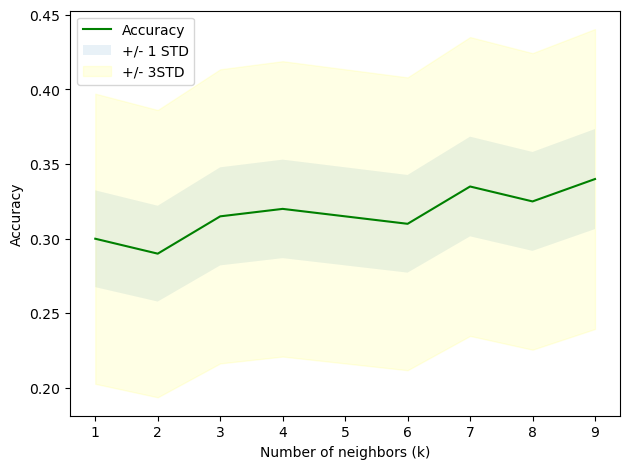

In [46]:
# plot the model accuracy
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc -1*std_acc, mean_acc + 1*std_acc, alpha=0.1)

plt.fill_between(range(1,Ks), mean_acc - 3*std_acc, mean_acc + 3*std_acc, alpha=0.1, color = 'yellow')
plt.legend(('Accuracy', '+/- 1 STD', '+/- 3STD'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout()
plt.show()

In [47]:
print(f'Best accuracy with mean {mean_acc.max()}, with a K = {mean_acc.argmax()+1}')

Best accuracy with mean 0.34, with a K = 9
